# Kurapati Venkatesh
# 09012021
# Topic: K-means Clustering

# ---------------------------------------------------------------------------

## 2.)	Perform clustering for the crime data and identify the number of clusters            formed and draw inferences. Refer to crime_data.csv dataset.

## -----------------------------------------------------------------------------------

### Business objective:
### • Clusters are useful in identifying a crime spree committed in cities by a single or the same group of suspects.
### • K-means clustering helps us identify patterns and groups in which the cities belong, since it is very difficult for humans to            process large amounts of data. 


## -------------------------------------------------------------------------------------------

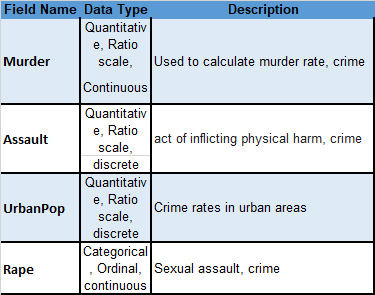

## ---------------------------------------------------------------------------------------------------------------------------

In [39]:
import seaborn as sns # for data visualization
import pandas as pd # for data analysis
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt # for data visualization

In [40]:
cri1 = pd.read_csv("G:/360digit/assignments meterial/H.Clustering/r/crime_data.csv")

In [41]:
cri1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [42]:
cri1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


This dataset has no null values

In [43]:
cri = cri1.drop(["States"], axis=1)

### ----------------------------------------------EDA---------------------------------------------------

Detectecting outliers via boxplot

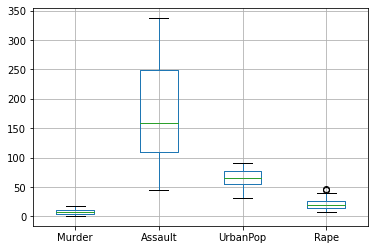

In [44]:
cri.boxplot()

Rape column has outliers

In [45]:
# create a user defined function remove_ol for getting the threshold value from IQR. 
def remove_ol(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

### Outliers Treatment:

#### Rape:

In [46]:
low, up = remove_ol(cri['Rape'])
cri['Rape'] = np.where(cri['Rape'] > up, up, cri['Rape']) 
cri['Rape'] = np.where(cri['Rape'] < low, low, cri['Rape']) 

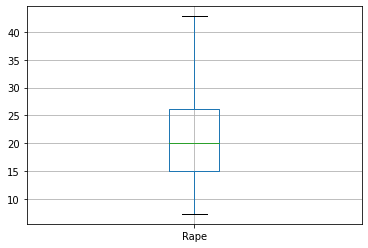

In [48]:
cri.boxplot(['Rape'])

##### Histogram Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F86299C70>,
      dtype=object)

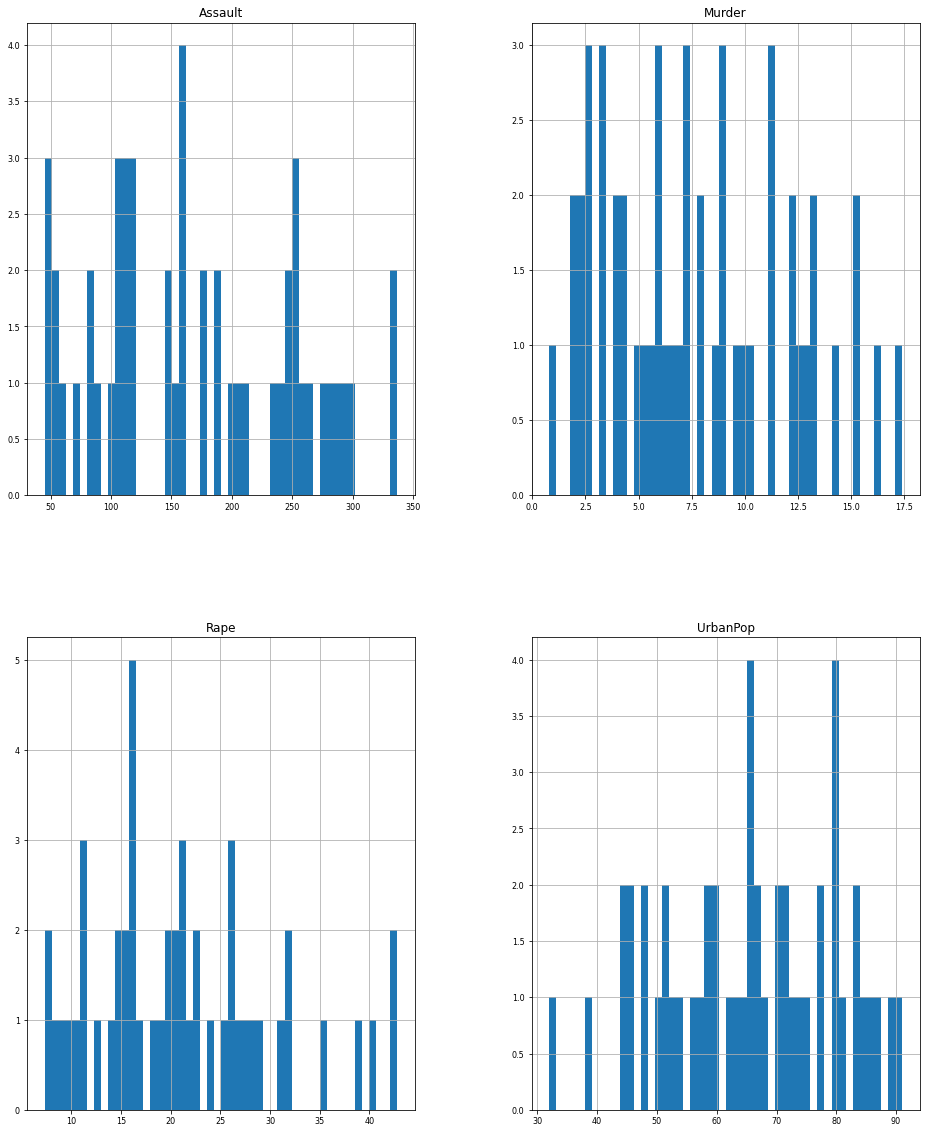

In [50]:
cri.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

##### Corelation Analysis:

In [51]:
cri.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.569678
Assault,0.801873,1.000000,0.258872,0.672108
UrbanPop,0.069573,0.258872,1.000000,0.419388
Rape,0.569678,0.672108,0.419388,1.000000


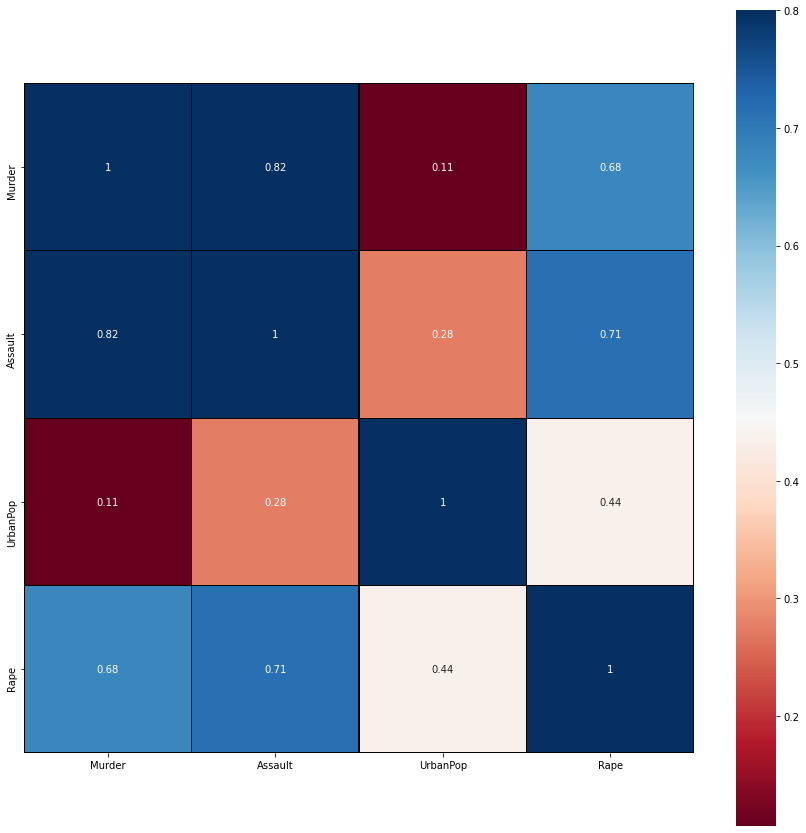

In [52]:
corr = cri.corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax = 0.8, linewidths = 0.01, square = True, annot = True, cmap='RdBu', linecolor='black')

Murder and Assault are highly corelated.

### Normalization function 

In [53]:
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

#### Normalized data frame (considering the numerical part of data)

In [54]:
df_norm = norm_func(cri)
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.391274
1,0.554217,0.746575,0.271186,1.000000
2,0.439759,0.852740,0.813559,0.667136
3,0.481928,0.496575,0.305085,0.343420
4,0.493976,0.791096,1.000000,0.937368


#### Scree plot or Elbow curve ######################################################

In [55]:
TWSS = []
k = list(range(2, 10))

In [56]:
from sklearn.cluster import KMeans
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[6.755182167622325,
 5.134910987938265,
 3.764333164167157,
 3.294400687276584,
 2.927996535484105,
 2.691247265241487,
 2.355434561405234,
 2.1667587118846283]

Text(0, 0.5, 'total_within_SS')

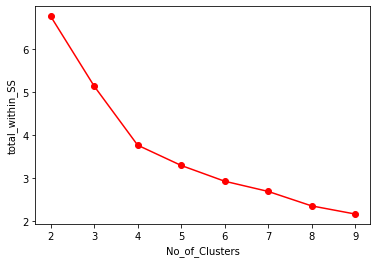

In [57]:
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

#### Selecting 4 clusters as optimum number of clusters from scree plot.

In [58]:
model = KMeans(n_clusters = 4)
model.fit(df_norm)

KMeans(n_clusters=4)

In [59]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
cri['clust'] = mb # creating a  new column and assigning it to new column 

In [60]:
cri.head()

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.200,2
1,10.0,263,48,42.825,0
2,8.1,294,80,31.000,0
3,8.8,190,50,19.500,2
4,9.0,276,91,40.600,0


In [62]:
cri = cri.iloc[:,[4,0,1,2,3]]
cri.head()

,Rape,clust,Murder,Assault,UrbanPop
0,21.200,2,13.2,236,58
1,42.825,0,10.0,263,48
2,31.000,0,8.1,294,80
3,19.500,2,8.8,190,50
4,40.600,0,9.0,276,91


In [64]:
cri.groupby(cri.clust).mean()
cri.to_csv("Kmeans_crime.csv", encoding = "utf-8")

import os
os.getcwd()

'C:\\Users\\Hp\\Documents\\jjjpter'

## Business Benefit:
### • This approach helps us to analyse the crime rates and enhance the crime resolution rate of the present.
### • Take actions to prevent future incidents by using preventive mechanisms based on observed patterns.
### • Increase operational efficiency by optimally re-deploying limited resources to the right places at the right times.
